# ERD (데이터 분석)

In [3]:
import pandas as pd

train_dataset = pd.read_csv("input/train.csv")
test_dataset = pd.read_csv("input/test.csv")

# train 만 찍으면 100만개의 data가 찍히므로 잘 안보이니까 head로 확인
train_dataset.head() # head : 상위 5개의 row만 보여준다.

# 만약 Nan이 찍혔다면 feature engineering을 통해 (평균값으로 메꾸던지, 없애던지..)해서 데이터 전처리

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset.head()
# train과 달리 survived 열이 없는 것을  확인 가능함
# 우린 train data를 통해 test data 생존 여부를 예측해야 함

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# data 정보 확인하기 (len, shape)
train_dataset.shape # (891, 12)
test_dataset.shape # (418, 11)

(418, 11)

In [6]:
# 빠진 정보 찾기 by info()

train_dataset.info() # info, info() 둘 다 되는데, ()로 하자
# 행은 891행인데, age, cabin에 누락된 것들이 보임 891개가 아님 >> NaN 인 듯
# 이렇게 유실된 정보를 그대로 모델링하면 이상한 값이 나오므로
# feature engineering으로 유실값을 채운다. (아까 말한 평균값 넣기 등..)
# 그렇게 의미있는 값으로 채운 후 모델에 넣어야 함!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# 빠진 정보 찾는 방법 2 : isnull().sum()
#train_dataset.isnull() # 모든 행의 열 성분이 null인지 아닌지 판단
train_dataset.isnull().sum() # 각 필드중 null이 몇개인지 누계

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 데이터 시각화 (matplotlib, seaborn)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 계속 똑같은 기능을 수행할 것이기 때문에 미리 함수로 지정
def bar_chart(feature):
    # 입력된 feature의 정보를 센다.
    survived = train_dataset[train_dataset['Survived']==1][feature].value_counts()
    dead = train_dataset[train_dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead]) # 2개로 dataframe 화
    df.index = ['survived', 'dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5)) # 바차트의 유형으로, 누적 허용, 크기 지정 (10,5)

In [12]:
# [train_dataset['Survived']==1] # 모든 행에 대해 살았냐 아니냐 여부만 보여줌 (survived filed only)
# train_dataset[train_dataset['Survived']==1] # 살은 사람에 대한 모든 정보를 출력 (이름, 성별 ~~ embarked)

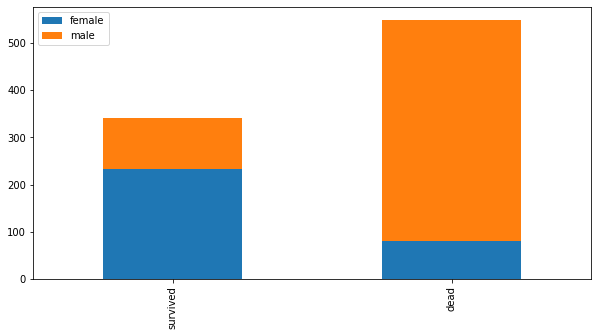

In [13]:
# 이걸 보고 여자가 남자보다는 살 확률이 높았다. 라는 것을 알 수 있음
bar_chart('Sex')

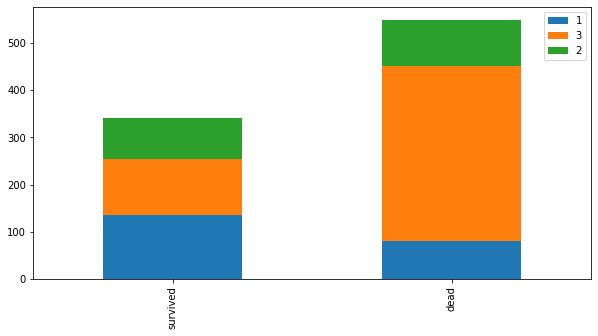

In [14]:
# 이것을 보고 1등석이 많이 살고, 3등석이 많이 죽은 것을 알 수 있음
bar_chart('Pclass')

# Feature Engieneering (데이터 전처리)

In [15]:
# feature(열)의 모든 성분이 숫자라면 이것은 feature vector로 표현 가능
# feature vector : [0, 1, 0, 1, 0, 0, 0, ...]
# 컴퓨터는 숫자로 알아보는게 훨씬 편하므로 텍스트의 value가 가진 것도 numeric하게 바꿔주면 좋음 (ex: Name)
# 같은 원리로 NaN도 웬만해선 숫자로 표현해서 넣는게 좋음

# 이렇게 2개를 엮음으로써 굳이 train, test 나눠서 처리하지 않아도됨 >> 아래의 for문으로 2 dataset 다 Title이란 field가 생김김
train_test_dataset = [train_dataset, test_dataset] # combining train and test dataset

for dataset in train_test_dataset:
    # 이름 중 Mr, Mrs 처럼 성별을 알 수 있는 정보들을 추출
    # by extract(' ([A-Za-z]+)\.') 정규 표현식으로 맨 앞 공백 허용 
    # [A-Za-z]+ : 1문자 이상의 영단어 허용
    # \. : 끝은 .으로 끝나도록 \를 넣어서 .은 인식 안하도록ㅠ
    # 이 정규 표현식은 공백 뒤에 오는 하나 이상의 영어 단어와 그 단어 다음에 마침표가 있는 패턴을 찾습니다. (Mr. , Mrs. 등등)
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



In [16]:
train_dataset.head() # Title이란 field 생성

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
train_dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [18]:
test_dataset['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [19]:
# 문자 내용을 numeric하게 변환 by mapping Table
# 많이 나온 Mr, Miss, Mrs 빼고 나머지는 모두 others인 3번 label로 처리
title_mapping = {
    "Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Col" : 3,
    "Rev" : 3, "Ms" : 3, "Dr" : 3, "Dona" : 3, "Mme" : 3, "Sir" : 3
}

for dataset in train_test_dataset:
    dataset['Title'] = dataset['Title'].map(title_mapping) # 기존 문자로 되어있던 Title value들을 숫자로 변환 by title_mapping table

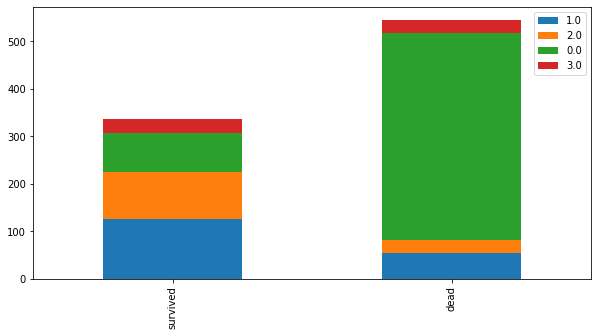

In [20]:
# 문자로 분석한 결과
bar_chart('Title') # 실행 결과 많은 Mr가 죽었고, 많은 Miss와 Mrs인 여성들이 생존

In [21]:
train_dataset.head() # Title이 숫자로 매핑됨됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


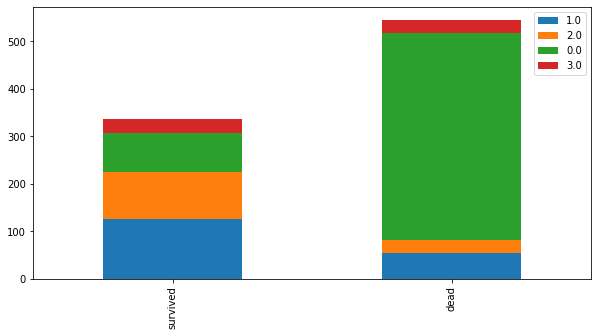

In [22]:
# 숫자로 변환하고 분석한 결과 >> 확실히 문자로 분석한 것과는 차이가 있음
bar_chart('Title')

In [23]:
# name중 유의미한 정보만 뽑아서 title에 숫자로 매핑했으므로
# name은 이제 쓸모없으니 field 삭제한다.
# axis=1 열방향 삭제, axis=0 행방향 삭제
# inplace > 원본에도 적용할 것인가?
train_dataset.drop('Name', axis=1, inplace=True)
test_dataset.drop('Name', axis=1, inplace=True)

In [24]:
train_dataset.head() # name field 삭제

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# 성별에 대한 feature engieneering

In [25]:
sex_mapping = {'male': 0, 'female': 1}

for dataset in train_test_dataset:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

train_dataset.head() # Sex에 대한 내용이 문자(male, female) -> 숫자(0, 1)로 변환됨

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


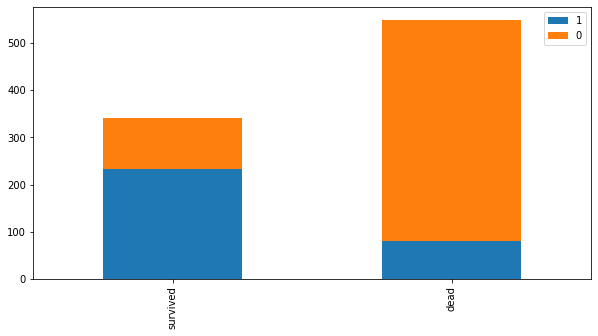

In [26]:
bar_chart('Sex')

## Nan 숫자 채우기 by fillna

In [27]:
train_dataset.head(100) # Age에 NaN이 은근 보임 이것을 채우자 어떤 방식으로 채울까?

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0.0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0.0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0.0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2.0


In [28]:
# 그냥 Age 모두 더해서 평균나이로 때울 수 있지만 이것 보다 조금 더 고도화해서
# 남자라면 남자의 평균나이를, 여자라면 여자의 평균나이를 넣는 것이 조금 더 좋은 전략
# 여기서도 여자의 경우 Miss 인지 Mrs에 따라 이에 대한 평균나이 넣기 (결혼했냐 안 했냐로)

# 이 수식 해석
# Nan 값이 있을 때 각 Title 별로 묶어서 (Mr, Miss, Mrs)
# 각 Title 별 Age를 구하고 그것의 median으로 Nan 값들을 채워라
train_dataset.fillna(train_dataset.groupby('Title')["Age"].transform("median"), inplace=True)
test_dataset.fillna(test_dataset.groupby("Title")["Age"].transform("median"), inplace=True)

In [29]:
# Title로 묶인 train_dataset 객체 > generic형태라 볼 수 없음
train_dataset.groupby('Title')

# Title로 그룹화된 train_dataset중 'Age' value만 모음
train_dataset.groupby('Title')['Age']

# 해당 Age들을 모두 중간값으로 변환
train_dataset.groupby('Title')['Age'].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     8.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

# Binning (범주화 시키기 정확한 나이보다는 연령으로 표현)

In [30]:
for dataset in train_test_dataset:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [31]:
train_dataset.head() # Age가 numeric -> categoric (범주형)으로 바뀜

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


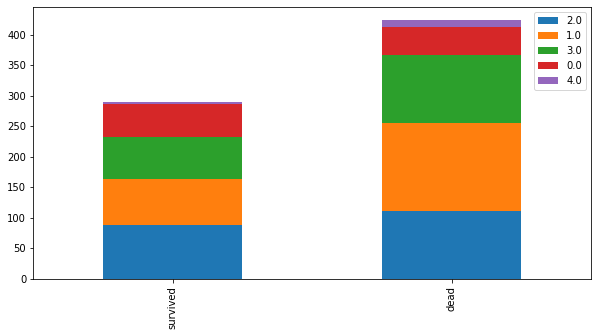

In [32]:
bar_chart('Age') # 나이는 너무 세분화하면 잘못 이해할 수 있으므로 이렇게 범주로 바꾸는게 예측에 편리함

# Embarked


<Axes: >

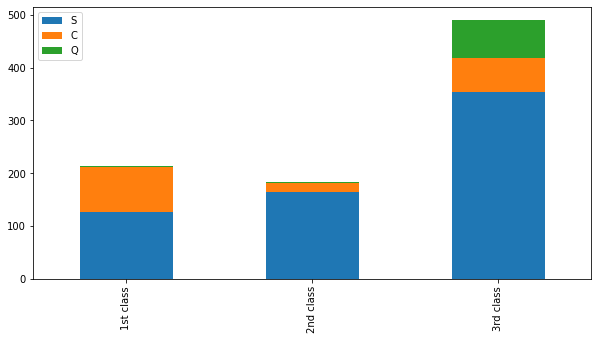

In [33]:
Pclass1 = train_dataset[train_dataset["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train_dataset[train_dataset["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train_dataset[train_dataset["Pclass"]==3]["Embarked"].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

# 정보를 찍어보니 Embarked에 Nan이 있다면 그냥 s라 채우는게 맞을 듯 (거의 s에서 탄 사람)
# Q에서 탄사람은 모두 3등급에 탄 사람이라 봐도 무방

In [34]:
# 정보를 찍어보니 Embarked에 Nan이 있다면 그냥 s라 채우는게 맞을 듯 (거의 s에서 탄 사람)
# 위 정보에 의해 Embarked에 빈값 s로 채우기
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].fillna('S') # fillna하면 알아서 빈값인 애만 채움 일일이 if문 안돌려도

train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [35]:
# Embarked도 문자정보이므로 숫자로 변환
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping) # transform과 map의 차이 : transform은 값을 중간값 등으로, map은 매핑

train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0


In [36]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        882 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [37]:
# 티켓 가격(Fare)에 대해서 분류
# 티켓 가격은 PClass와 상관관계가 있을것이므로, pclass 마다의 평균값으로 결측치를 메꿈
# pclass는 결측치가 없었음 >> 근데 Fare도 결측치는 없는데?
train_dataset["Fare"].fillna(train_dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_dataset["Fare"].fillna(test_dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)


c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


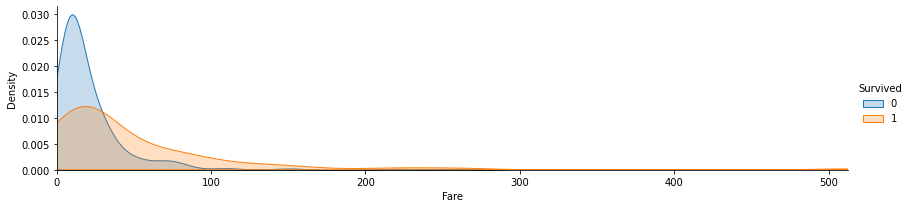

In [38]:
facet = sns.FacetGrid(train_dataset, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_dataset["Fare"].max()))
facet.add_legend()

plt.show() # 찍어보니 싼 티켓(Fare)의 사람이 비싼 티켓 사람보다 많이 죽은 것을 알 수 있다.

In [39]:
# binning을 써서 가격도 범주화하자
for dataset in train_test_dataset:
    dataset.loc[ dataset["Fare"] <= 17, 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [40]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


# Cabin은 문자에다가 nan도 있는데 어떻게 채울것이고 숫자로 바꿀까 ?

In [41]:
train_dataset["Cabin"].value_counts() # 찍어보니 Cabin의 패턴은 알파벳이 1개있고 이후 숫자가 오는 패턴

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [42]:
# 첫번째 알파벳만 받아오자
for dataset in train_test_dataset:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


<Axes: >

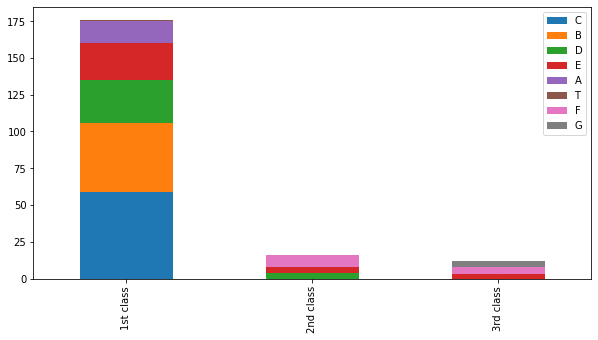

In [44]:
Pclass1 = train_dataset[train_dataset['Pclass']==1]['Cabin'].value_counts() # class가 1인 사람의 Cabin(방) 카운트
Pclass2 = train_dataset[train_dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_dataset[train_dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5)) # cabin이 A,B,C로 시작하면 1등급에만 거의 존재

In [45]:
# feature scailing으로 cabin을 범주화 (정확히 왜 그렇게 뒀는지는 검색하기)
# 우선 매핑을 통해 str -> numeric으로 변환
cabin_mapping = {'A': 0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2.0, 'G':2.4, 'T':2.8}
for dataset in train_test_dataset:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

train_dataset.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


In [46]:
# 우선 매핑을 통해 str -> numeric으로 변환까진 했는데,
# 이제 Nan값은 어떻게 채울까?
# Cabin은 Pclass와 상당히 상관관계가 있으므로 Pclass로 구분지어 중간값 삽입
train_dataset["Cabin"].fillna(train_dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_dataset["Cabin"].fillna(test_dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [47]:
# 같이온 사람 여부 (사촌, 가족 등..)
train_dataset["FamilySize"] = train_dataset["SibSp"] + train_dataset["Parch"] + 1 # 새로운 FamilySize field 생성 (여기엔 동반자 모두 카운트)
test_dataset["FamilySize"] = test_dataset["SibSp"] + test_dataset["Parch"] + 1 # + 1은 자기 자신

c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\hojun\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

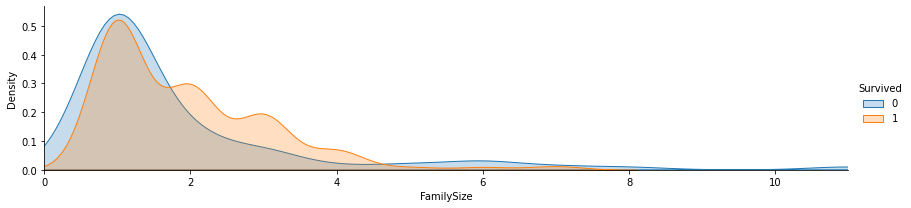

In [48]:
facet = sns.FacetGrid(train_dataset, hue="Survived", aspect=4) # aspect ?
facet.map(sns.kdeplot, 'FamilySize', shade=True) # FamilySize에 따른 생존여부를 보여주고 그래프 안쪽 채우기 True
facet.set(xlim=(0, train_dataset["FamilySize"].max())) # x축 길이는 0 ~ 가장 많은 동반자까지 제한
facet.add_legend() # 어떤게 생존인지 범주 보여주기 0, 1
plt.xlim(0) # 그림을 보니 동반자가 많을 수록 생존을 많이 함

In [49]:
# familysize도 이미 정수지만.. 좀 더 범주화를 위해 구분함
family_mapping = {1: 0, 2: 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6 : 2.0, 7 : 2.4, 8 : 2.8, 9 : 3.2, 10 : 3.6, 11 : 4.0}

# mapping
for dataset in train_test_dataset:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [55]:
# 여기서 이제 SibSP와 Parch는 FamilySize로 퉁쳤으므로 필요 없음 drop하기
# train_test_dataset.drop(["SibSp", "Parch"], axis=1) >> train_test_dataset은 list라 drop이 안 됨, df 형태만 가능
# train_dataset = train_dataset.drop(["SibSp", "Parch", "Ticket"], axis=1) # SibSp, Parch field 삭제
# train_dataset

# Ticket은 아무짝에 활용이 안되므로 삭제
train_dataset = train_dataset.drop(["Ticket"], axis=1) # SibSp, Parch field 삭제
train_dataset

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0.0,1.8,0,3.0,0.0
887,888,1,1,1,1.0,1.0,0.4,0,1.0,0.0
888,889,0,3,1,NaN,1.0,2.0,0,1.0,1.2
889,890,1,1,0,1.0,1.0,0.8,1,0.0,0.0


In [56]:
# test_dataset.drop(["SibSp", "Parch","Ticket"], axis=1, inplace=True) # inplace=True 설정해서 바로 df에 적용
# test_dataset

test_dataset.drop(["Ticket"], axis=1, inplace=True) # inplace=True 설정해서 바로 df에 적용
test_dataset

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0.0,2.0,0,0,0.0
414,1306,1,1,3.0,3.0,0.8,1,3,0.0
415,1307,3,0,3.0,0.0,2.0,0,0,0.0
416,1308,3,0,NaN,0.0,2.0,0,0,0.0
